In [64]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('Position_Salaries.csv')

In [66]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Separating the independent and dependent features
#### Dependent feature


In [67]:
y = np.asarray(df['Salary'].values.tolist()) 


### Independent Feature

In [68]:
X = np.asarray(df['Level'].values.tolist())

In [69]:
X.shape

(10,)

In [70]:
y.shape

(10,)

In [71]:
# Reshaping the independent feature
X = X.reshape(-1,1)

In [72]:
# Changing the shape from (10,) to (10,1)

In [73]:
#Reshaping the Dependent features
y = y.reshape(len(y),1) 

In [74]:
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (10, 1)
The shape of the dependent fatures are  (10, 1)


### The method "poly_features" concatenates polynomials of independent feature to X
### This is similar to PolynomialFeatures class from sklearn.preprocessing

In [75]:
def poly_features(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  return X_poly

### The method "split_data" splits the given dataset into trainset and testset
### This is similar to the method "train_test_split" from "sklearn.model_selection"

In [76]:
def split_data(X,y,test_size=0.2,random_state=0):
     np.random.seed(random_state)                  #set the seed for reproducible results
     indices= np.random.permutation(len(X))       #shuffling the indices
     data_test_size = int(X.shape[0] * test_size)  #Get the test size

        
    #Separating the Independent and Dependent features into the Train and Test Set
     train_indices = indices[data_test_size:]
     test_indices = indices[:data_test_size]
     X_train = X[train_indices]
     y_train = y[train_indices]
     X_test = X[test_indices]
     y_test = y[test_indices]
     return X_train, y_train, X_test, y_test

###  The method pred_to_plot returns predictions on given values and helps in
### better visualization

In [77]:
def pred_to_plot(W_trained, X):
  prediction_values = list()
  for i in range(X.shape[0]):
    value = regressor.predict(W_trained,X[i])
    prediction_values.append(value)
  return prediction_values

### Coding the polynomialRegression Class




In [78]:
class polynomialRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred



### UPDATING WEIGHTS

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W



### TRAINING

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights

    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs



### TESTING 

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    


### PREDICTING 

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction


### PLOTING LOSS

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()



### Polynomial Regression (N = 2)

We iterate over various values of  N, after the initial results. 

In [79]:
# first, we need to create another column  Level^2, since it's our Independent Feature.

X = np.asarray(df['Level'].values.tolist())

In [80]:
# Reshaping the independent feature
X = X.reshape(-1,1)

X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [81]:
X = poly_features(2,X)

C:\Users\gnssi\AppData\Local\Temp\ipykernel_17024\86361913.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i-1] = (X**i).reshape(-1,1)


In [82]:
#Adding the feature X0 = 1, so we have the equation: y =  W0 + (W1 * X1) + (W2 * (X1**2))


X = np.concatenate((X,np.ones((10,1))), axis = 1)
X

array([[  1.,   1.,   1.],
       [  2.,   4.,   1.],
       [  3.,   9.,   1.],
       [  4.,  16.,   1.],
       [  5.,  25.,   1.],
       [  6.,  36.,   1.],
       [  7.,  49.,   1.],
       [  8.,  64.,   1.],
       [  9.,  81.,   1.],
       [ 10., 100.,   1.]])

In [83]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [84]:
#Splitting the dataset

X_train, y_train, X_test, y_test = split_data(X,y)

In [85]:
#declaring the "regressor" as an object of the class polynomialRegression

regressor = polynomialRegression()

In [86]:
#Training for polynomial with degree=2

W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.00001)

In [87]:
#Testing on the Test Dataset

test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

#### Visualizing the result with graphs

In [88]:
pred_plot = pred_to_plot(W_trained,X)

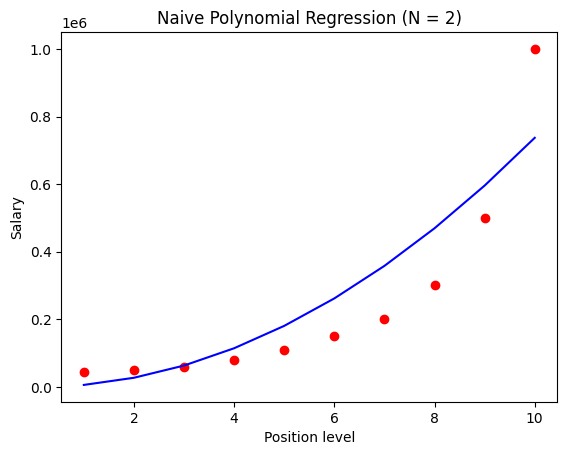

In [89]:
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()